In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Mount Drive, read file
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/aML/airbnb.csv')


df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       51707 non-null  float64
 1   room_shared                 51707 non-null  bool   
 2   room_private                51707 non-null  bool   
 3   person_capacity             51707 non-null  int64  
 4   host_is_superhost           51707 non-null  bool   
 5   multipleRooms               51707 non-null  bool   
 6   businessListing             51707 non-null  bool   
 7   cleanliness_rating          51707 non-null  int64  
 8   guest_satisfaction_overall  51707 non-null  int64  
 9   city_dist                   51707 non-null  float64
 10  metro_dist                  51707 non-null  float64
 11  city            

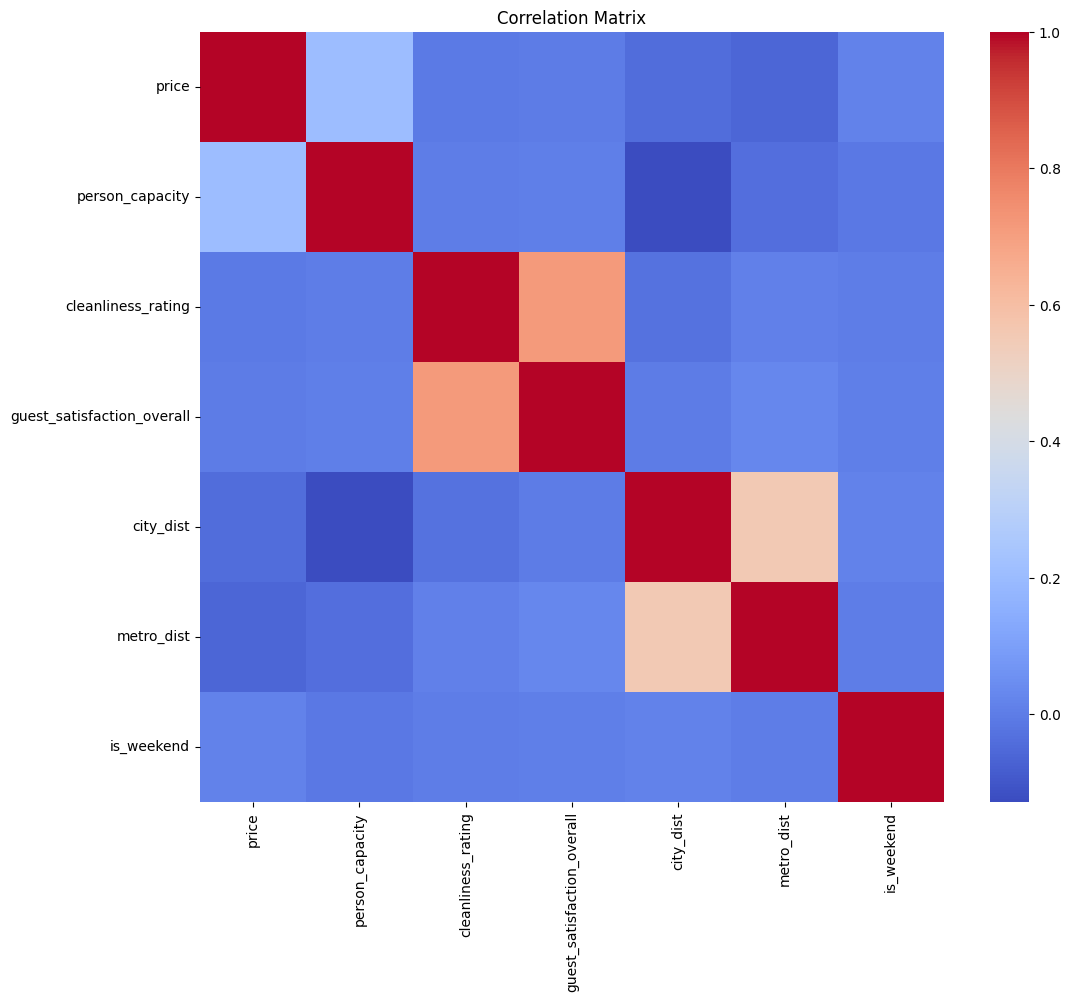

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   room_shared                 51707 non-null  bool   
 1   room_private                51707 non-null  bool   
 2   person_capacity             51707 non-null  int64  
 3   host_is_superhost           51707 non-null  bool   
 4   multipleRooms               51707 non-null  bool   
 5   businessListing             51707 non-null  bool   
 6   cleanliness_rating          51707 non-null  int64  
 7   guest_satisfaction_overall  51707 non-null  int64  
 8   city_dist                   51707 non-null  float64
 9   metro_dist                  51707 non-null  float64
 10  entire_home                 51707 non-null  bool   
 11  is_luxury                   51707 non-null  bool   
 12  city_amsterdam              51707 non-null  bool   
 13  city_athens                 517

In [ ]:
# One-hot Encoding for city
df_encoded = pd.get_dummies(df, columns=['city'], prefix='city')

# Binary Encoding for time_period
df_encoded['is_weekend'] = (df_encoded['time_period'] == 'weekends').astype(int)

# Create combined stratification column
df_encoded['strat_column'] = df['city'] + '_' + df['time_period']


numerical_df = df_encoded.select_dtypes(include=np.number)
numerical_df.drop(['log_price'], axis=1, inplace=True)

corr_matrix = numerical_df.corr()
# 1) Plot the full correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


#Define features and target
X = df_encoded.drop(['price', 'log_price', 'time_period', 'strat_column'], axis=1)
y = df_encoded['log_price']

#Stratification split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=df_encoded['strat_column']
)

print(X.info())


In [ ]:
# Scaling
scaler = StandardScaler()

numerical_cols = ['person_capacity', 'cleanliness_rating',
                 'guest_satisfaction_overall', 'city_dist', 'metro_dist']

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])